In [55]:
import pandas as pd
import os
import glob

In [56]:
result_jsonl_list = glob.glob("data/eval_collection/*/*result.jsonl")
result_jsonl_list.sort(reverse=True)
eval_jsonl_list = glob.glob("data/eval_collection/*/*eval.jsonl")
eval_jsonl_list.sort(reverse=True)
eval_jsonl_list

['data/eval_collection/Snowflake500+Routing+Prune100+Rerank20/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake50+Routing+Prune20+Rerank10/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake100+Routing+VRSD+Prune20+Rerank10/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake100+Routing+Prune20+Rerank10_v2/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake100+Routing+Prune20+Rerank10/testset-50q-eval.jsonl',
 'data/eval_collection/Snowflake10+Routing/testset-50q-eval.jsonl']

In [57]:
for k, v in (zip(result_jsonl_list,eval_jsonl_list)):
    ex = pd.read_json(k, lines=True)
    ev = pd.read_json(v, lines=True)
    m = pd.concat([ex, ev], axis=1)
    collection_name = k.split("/")[-2]
    cols = ['id', 'doc_id', 'question_category', 'question_category_desc',
       'user_category', 'user_category_desc', 'question', 'gold', 'answer',
       'idx', 'faithfulness', 'relevance',
       'faithfulness_correct', 'relevance_correct']
    m[cols].to_csv(f'data/eval_collection/{collection_name}/merge-for-eda.csv', index=False)

In [58]:
sumdf_list = []
stat_df_list = []
for jsonl in eval_jsonl_list:
    df = pd.read_json(jsonl, lines=True)
    # df = df.iloc[:27]
    stat_df_list.append({
        "n_faithfulness_na": df['faithfulness'].isna().sum(),
        "n_relevance_na": df['relevance'].isna().sum(),
        "collection_name": jsonl.split("/")[-2],
    })
    
    # df['relevance_correct'] = (df['relevance'] >= 1).astype(int)
    sumdf = {
        # 'faithfulness_correct': (df['faithfulness'].dropna() >= 1).mean(),
        # 'relevance_correct': (df['relevance'].dropna() >= 1).mean(),
        'faithfulness_correct': (df['faithfulness_correct']).mean(),
        'relevance_correct': (df['relevance_correct']).mean(),
        "collection_name": jsonl.split("/")[-2]
    }
    sumdf_list.append(sumdf)
sumdf_list = pd.DataFrame(sumdf_list).set_index("collection_name")
sumdf_list = sumdf_list.sort_values("faithfulness_correct")

stat_df_list = pd.DataFrame(stat_df_list)
sumdf_list


,faithfulness_correct,relevance_correct
collection_name,,
Snowflake10+Routing,0.571429,0.836735
Snowflake500+Routing+Prune100+Rerank20,0.645833,0.802083
Snowflake50+Routing+Prune20+Rerank10,0.714286,0.846939
Snowflake100+Routing+VRSD+Prune20+Rerank10,0.714286,0.836735
Snowflake100+Routing+Prune20+Rerank10_v2,0.770833,0.822917
Snowflake100+Routing+Prune20+Rerank10,0.795918,0.816327


In [59]:
stat_df_list

,n_faithfulness_na,n_relevance_na,collection_name
0,8,0,Snowflake500+Routing+Prune100+Rerank20
1,5,0,Snowflake50+Routing+Prune20+Rerank10
2,7,0,Snowflake100+Routing+VRSD+Prune20+Rerank10
3,4,0,Snowflake100+Routing+Prune20+Rerank10_v2
4,2,0,Snowflake100+Routing+Prune20+Rerank10
5,11,0,Snowflake10+Routing


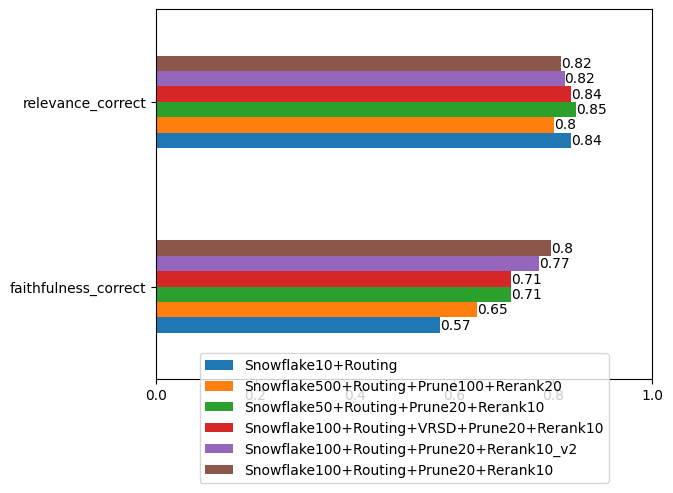

In [60]:
ax = sumdf_list.T.plot.barh()
for container in ax.containers:
    ax.bar_label(container, fmt="%.2g")
    
ax.set_xlim(0, 1)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))